**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Soner Yıldırım, Bex T, Manuel Hupperich, Youssef Hosni and Piero Paialunga en www.towardsdatascience.com. Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# Time Series Analysis: Preparing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [ ]:
google = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


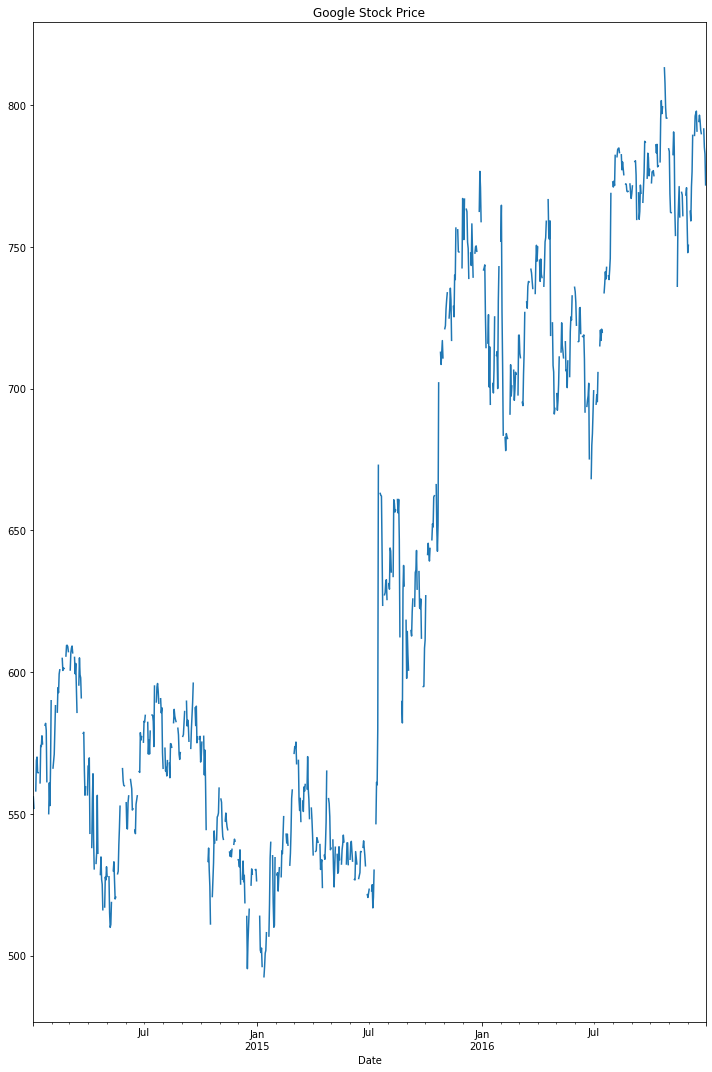

In [ ]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout() 
plt.show();

The example below shows converting DateTimeIndex of the google stock data into calendar day frequency. The number of instances has increased to 756 due to this daily sampling. The code below prints the first five rows of the daily resampled data:

In [ ]:
google.asfreq('D').info() # set calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
google = google.asfreq('B') # Change to calendar day frequency only the working day's data.
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


### Lags, changes, and returns for stock price series

In [ ]:
google['shifted'] = google.Close.shift() # default: periods=1
google.head(3)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95


In [ ]:
google['lagged'] = google.Close.shift(periods=-1)
google

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,558.10
2014-01-06,558.10,551.95,568.86
2014-01-07,568.86,558.10,570.04
2014-01-08,570.04,568.86,564.55
...,...,...,...
2016-12-26,NaN,789.91,791.55
2016-12-27,791.55,NaN,785.05
2016-12-28,785.05,791.55,782.79


### Resampling

In [ ]:
# Creating Quarterly data
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [ ]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly = monthly.to_frame('baseline') # to DataFrame
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [ ]:
# Differnet Upsampling fill methods
monthly['ffill'] = quarterly.asfreq('M', method='ffill') # bfill back fill
monthly['bfill'] = quarterly.asfreq('M', method='bfill') # ffill : forward fill
monthly['value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


In [ ]:
# using reindex 
dates = pd.date_range(start='2016', periods=12, freq='M')
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

### Upsampling & interpolation

In [ ]:
unrate = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/monthly%20unemployment%20rate.csv', parse_dates=['DATE'], index_col='DATE')
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


So let's resample it by the starting of each calendar month using both dot-resample and dot-asfreq methods. Both of the methods are the same. When looking at resampling by month, we have so far focused on month-end frequency. In other words, after resampling, new data will be assigned the last calendar day for each month.

In [ ]:
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [ ]:
unrate.resample('MS') # creates Resampler object
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

In [ ]:
ozone = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [ ]:
ozone = ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [ ]:
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [ ]:
ozone.resample('M').median().head()

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


In [ ]:
ozone.resample('M').agg(['mean', 'std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

<AxesSubplot:xlabel='date'>

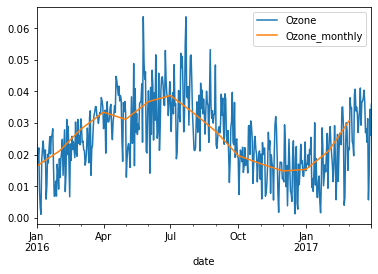

In [ ]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

In [ ]:
# Integer-based window size
ozone.rolling(window=30, min_periods=1).mean() # fixed # observations

,Ozone
date,
2016-01-01,0.023206
2016-01-02,0.020030
2016-01-03,0.019516
2016-01-04,0.020166
2016-01-05,0.017789
...,...
2017-03-27,0.030317
2017-03-28,0.029861
2017-03-29,0.030507


In [ ]:
# Offset-based window size
ozone.rolling(window='30D').mean() # fixed period length

,Ozone
date,
2016-01-01,0.023206
2016-01-02,0.020030
2016-01-03,0.019516
2016-01-04,0.020166
2016-01-05,0.017789
...,...
2017-03-27,0.030317
2017-03-28,0.029861
2017-03-29,0.030507


<AxesSubplot:xlabel='date'>

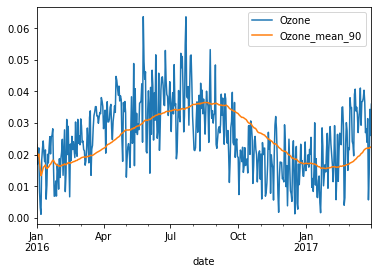

In [ ]:

r90 = ozone.rolling(window='90D').mean()
ozone.join(r90.add_suffix('_mean_90')).plot()